In [63]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from pyvis.network import Network
import seaborn as sns
from matplotlib.colors import LogNorm  # Import LogNorm for logarithmic color scale

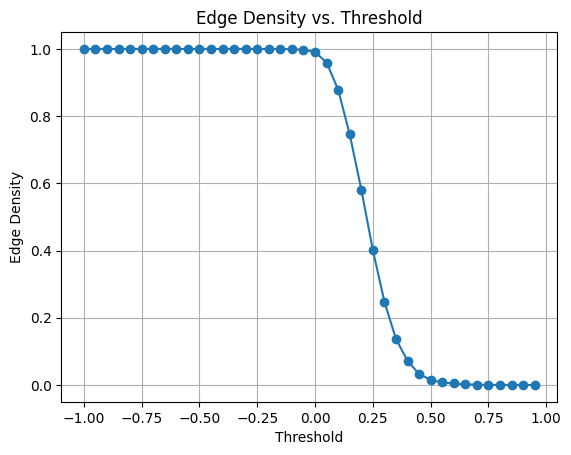

Edge density of graph at threshold 0.4 is 0.07160804020100503
Number of edges of network 1425

Top 10 central nodes based on degree centrality

Node L%26TFH: 0.38190954773869346 Centrality = 0.3819
Node DLF: 0.36683417085427134 Centrality = 0.3668
Node SBIN: 0.36180904522613067 Centrality = 0.3618
Node FEDERALBNK: 0.35678391959798994 Centrality = 0.3568
Node GRASIM: 0.34673366834170855 Centrality = 0.3467
Node IDFCFIRSTB: 0.3165829145728643 Centrality = 0.3166
Node CANBK: 0.3165829145728643 Centrality = 0.3166
Node LT: 0.2814070351758794 Centrality = 0.2814
Node JSWSTEEL: 0.271356783919598 Centrality = 0.2714
Node AXISBANK: 0.271356783919598 Centrality = 0.2714

Top 10 central nodes based on betweenness centrality

Node GRASIM: 0.10399415672719646 Centrality = 0.1040
Node ADANIPORTS: 0.046127718197147984 Centrality = 0.0461
Node HINDALCO: 0.038443418448001955 Centrality = 0.0384
Node SBIN: 0.037087905633253405 Centrality = 0.0371
Node TATACONSUM: 0.03685152168828443 Centrality = 0.0369

In [60]:
colname = 'CH_CLOSING_PRICE'
df = pd.read_csv('correlation_data/correlation_log_diff_' + colname + '.csv')

def plot_threshold(corr_df):
    G = nx.Graph()
    nodes = set(corr_df['FILENAME1'].unique()) | set(corr_df['FILENAME2'].unique())
    G.add_nodes_from(nodes)
    for _, row in corr_df.iterrows():
        weight = row['CORRELATION']
        if row['FILENAME1'] != row['FILENAME2']:
            G.add_edge(row['FILENAME1'], row['FILENAME2'], weight=weight)

    thresholds = np.arange(-1, 1, 0.05)  # Stops before 0.95 to avoid exceeding 0.9
    edge_densities = []

    for thresh in thresholds:
        filtered_edges = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] > thresh]
        edge_density = len(filtered_edges) / (len(nodes) * (len(nodes) - 1) / 2)  # Formula for edge density
        edge_densities.append(edge_density)

    plt.plot(thresholds, edge_densities, marker='o')
    plt.xlabel('Threshold')
    plt.ylabel('Edge Density')
    plt.title('Edge Density vs. Threshold')
    plt.grid(True)
    plt.show()

plot_threshold(df)
threshold = 0.4


def create_network(corr_df, threshold):
    G = nx.Graph()
    nodes = set(corr_df['FILENAME1'].unique()) | set(corr_df['FILENAME2'].unique())
    G.add_nodes_from(nodes)
    for _, row in corr_df.iterrows():
        weight=row['CORRELATION']
        if weight > threshold and row['FILENAME1'] != row['FILENAME2']:
            G.add_edge(row['FILENAME1'], row['FILENAME2'], weight=weight)
    edge_density = (2 * len(G.edges())) / (len(G.nodes()) * (len(G.nodes()) - 1)) # 2E / V(V-1)
    print(f"Edge density of graph at threshold {threshold} is {edge_density}")
    return G

G = create_network(df, threshold)
print(f"Number of edges of network {G.number_of_edges()}")

def sort_and_print_top_x(df, num, centrality):
    sorted_df = sorted(df.items(), key=lambda x: x[1], reverse=True)

    print(f"\nTop 10 central nodes based on {centrality} centrality\n")
    for node, centrality in sorted_df[:num]:
        print(f"Node {node}: {centrality} Centrality = {centrality:.4f}")

def calculate_centrality_measures(network):

    # Calculate the degree centrality
    degree_centrality = nx.degree_centrality(network)
    sort_and_print_top_x(degree_centrality, 10, 'degree')

    # Calculate the betweenness centrality
    betweenness_centrality = nx.betweenness_centrality(network)
    sort_and_print_top_x(betweenness_centrality, 10, 'betweenness')

    pagerank = nx.pagerank(network, max_iter=2000)
    sort_and_print_top_x(pagerank, 10, 'pagerank')

    eigenvector_centrality = nx.eigenvector_centrality(network)
    sort_and_print_top_x(eigenvector_centrality, 10, 'eigenvector')

calculate_centrality_measures(G)

net = Network()
net.from_nx(G)

# net.toggle_physics(False)
# net.show_buttons(filter_=['physics'])

net.force_atlas_2based(
    # theta = 0.5,
    gravity=-50, 
    central_gravity=0.01, 
    spring_length=100,
    spring_strength=0.08, 
    damping=0.4, 
    overlap=0
)


net.save_graph('out.html')

In [67]:
degrees = G.degree()

max_degree_node = max(degrees, key=lambda x: x[1])
max_degree_node

('L%26TFH', 76)